### Libraries

In [2]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

import leafmap
import math
import shapely
import h3
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/tmp/ipykernel_1522/2214547321.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For

### GeoDataFrame Object of 'Espacios Públicos en GDL'

In [3]:
schema = 'espacios_publicos'
table = 'ep_amg'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,Fuente,Tipo,Uso,geometry
0,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672507.028 2272132.201, 672520.126 2..."
1,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672520.126 2272170.353, 672507.028 2..."
2,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672494.325 2272095.205, 672480.366 2..."
3,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672480.366 2272060.731, 672494.325 2..."
4,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672468.717 2272020.613, 672456.895 2..."


In [3]:
gdf.shape

(8499, 4)

In [4]:
gdf['Tipo'].unique()

array(['Parque', 'Espacio verde vecinal', 'Glorieta', 'Camellón',
       'Área natural', 'Unidad deportiva', 'Plaza',
       'Área natural protegida'], dtype=object)

### Plot'Espacios Públicos'

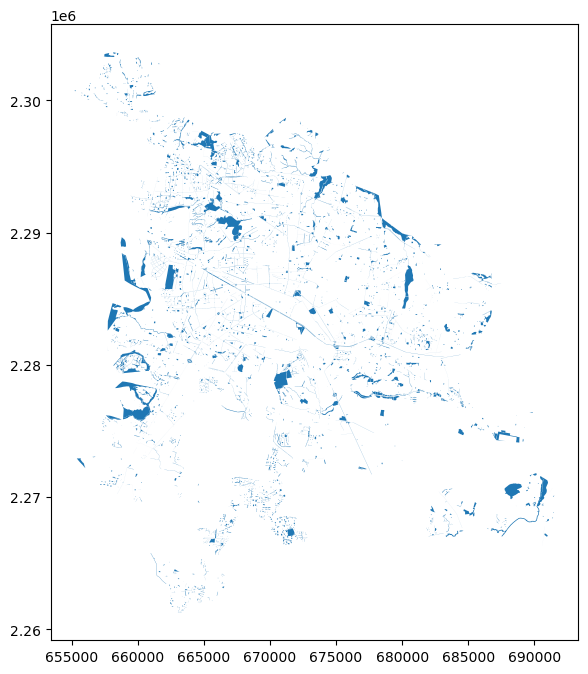

In [5]:
#gdf.plot()
f, axx = plt.subplots(1, figsize=(8, 8))
axx = gdf.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()
#trabajar con resolución 11
#city: gdl

### GeoDataFrame Object of 'Guadalajara' in Hexagons

In [4]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'Guadalajara'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_gdl = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdl.head(5)

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-103.60989 20.39686, -103.61044 20.4...",8849abc91bfffff,14002,Guadalajara
1,"POLYGON ((-103.61277 20.37822, -103.60824 20.3...",8849abc953fffff,14002,Guadalajara
2,"POLYGON ((-103.58960 20.38835, -103.58905 20.3...",8849abc901fffff,14002,Guadalajara
3,"POLYGON ((-103.66739 20.43582, -103.66683 20.4...",8849abc8adfffff,14002,Guadalajara
4,"POLYGON ((-103.66904 20.45140, -103.66452 20.4...",8849ab5249fffff,14002,Guadalajara


In [7]:
hex_gdl.shape

(4095, 4)

### Plot 'Hexagons-Guadalajara'

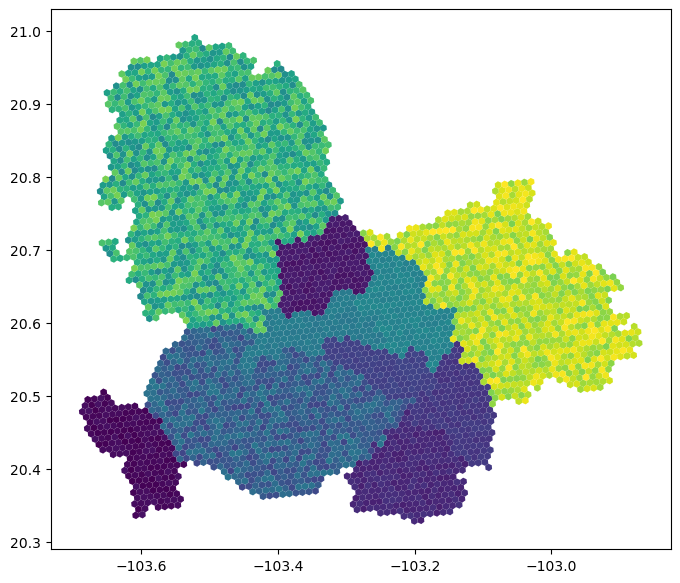

In [8]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = hex_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [8]:
gdf = gdf.to_crs(hex_gdl.crs)
print("CRS of gdf:", gdf.crs)
print("CRS of hex_gdl:", hex_gdl.crs)

CRS of gdf: epsg:4326
CRS of hex_gdl: epsg:4326


### Intersección Espacial

In [10]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Espacios públicos", zoom_to_layer=True)
m.add_gdf(hex_gdl, layer_name="Hexagonos", zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Análisis Variables 

#### DataFrame Intersección Espacios Públicos con Hexágonos

In [9]:
inter_Gdl = gpd.sjoin(hex_gdl, gdf, op='intersects')
inter_Gdl

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,5578,"Carta topográfica1:20,000, INEGI.",Glorieta,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7475,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7477,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
...,...,...,...,...,...,...,...,...
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,278,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,279,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,284,Instrumentos de planeación urbana. Disponible:...,Glorieta,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,280,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo


In [12]:
inter_Gdl.shape

(10279, 8)

In [13]:
inter_Gdl.loc[inter_Gdl['hex_id_8'] == '88498c9653fffff']

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo


#### DataFrame No Intersección

In [14]:
#no_inter_Gdl = gpd.overlay(hex_gdl, gdf, how='difference')
no_inter_Gdl = hex_gdl[~hex_gdl.index.isin(inter_Gdl.index)]
no_inter_Gdl

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-103.60989 20.39686, -103.61044 20.4...",8849abc91bfffff,14002,Guadalajara
1,"POLYGON ((-103.61277 20.37822, -103.60824 20.3...",8849abc953fffff,14002,Guadalajara
2,"POLYGON ((-103.58960 20.38835, -103.58905 20.3...",8849abc901fffff,14002,Guadalajara
3,"POLYGON ((-103.66739 20.43582, -103.66683 20.4...",8849abc8adfffff,14002,Guadalajara
4,"POLYGON ((-103.66904 20.45140, -103.66452 20.4...",8849ab5249fffff,14002,Guadalajara
...,...,...,...,...
4090,"POLYGON ((-102.93423 20.66349, -102.92968 20.6...",88498c9901fffff,14124,Guadalajara
4091,"POLYGON ((-103.26340 20.70318, -103.25886 20.7...",88498c9511fffff,14124,Guadalajara
4092,"POLYGON ((-102.97021 20.68372, -102.96567 20.6...",88498c99cdfffff,14124,Guadalajara
4093,"POLYGON ((-103.04243 20.77395, -103.04698 20.7...",88498c8a53fffff,14124,Guadalajara


In [15]:
no_inter_Gdl.shape

(3250, 4)

In [16]:
no_inter_Gdl.loc[no_inter_Gdl['hex_id_8'] == '88498c9653fffff']

,geometry,hex_id_8,CVEGEO,metropolis


Encontrar si funcionó la separación

In [17]:
values_set1 = set(inter_Gdl['hex_id_8'])
values_set2 = set(no_inter_Gdl['hex_id_8'])

# Find the common values (intersection) between the two sets
common_values = values_set1.intersection(values_set2)

# Get the count of common values
count_common_values = len(common_values)

# Print the count of common values
print(f'Total common values between inter_Gdl and no_inter_Gdl: {count_common_values}')

Total common values between inter_Gdl and no_inter_Gdl: 0


In [18]:
inter_Gdl.isna().sum()

geometry       0
hex_id_8       0
CVEGEO         0
metropolis     0
index_right    0
Fuente         0
Tipo           0
Uso            0
dtype: int64

In [19]:
no_inter_Gdl.isna().sum()

geometry      0
hex_id_8      0
CVEGEO        0
metropolis    0
dtype: int64

In [20]:
inter_Gdl['Uso'].unique()

array(['Uso recreativo', 'Sin uso recreativo'], dtype=object)

### Definir que espacios verdes nos interesan

De acuerdo a Sudipto, Roy; Byrne, Jason y Pickering, Catherine (2012), “A systematic quantitative review of urban tree benefits, costs, and assessment methods across cities in different climatic zones”, Urban Forestry & Urban Greening, 11 (4), Amsterdam, Elsevier, pp. 351-363, doi.org/10.1016/j.ufug.2012.06.006 [ Links ], Las áreas verdes públicas incluyen parques, plazas y jardines, bosques urbanos, campos deportivos, bordos y canales, jardines comunitarios, camellones y áreas naturales protegidas

In [10]:
def mapear_tipo(valor):
    tipos_1 = ['Parque', 'Plaza', 'Área natural', 'Unidad deportiva', 'Espacio verde vecinal', 'Área natural protegida']
    if valor in tipos_1:
        return 1
    elif valor in ['Glorieta', 'Camellón']:
        return 0
    else:
        return None  # Puedes cambiar esto si deseas manejar otros valores

# Aplicar la función para crear la nueva columna
inter_Gdl['EspVerPub'] = inter_Gdl['Tipo'].apply(mapear_tipo)
inter_Gdl.drop(columns=['index_right','Fuente','Uso'], inplace=True)

In [8]:
inter_Gdl.head(4)

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso,EspVerPub
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo,1
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo,1
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,5578,"Carta topográfica1:20,000, INEGI.",Glorieta,Sin uso recreativo,0
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7475,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo,0


### Exportamos los hexágonos con información de NDMI

In [7]:
hex_schema = "raster_analysis"
hex_table = "ndmi_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" LIKE \'{c}\' AND \"res\" = {n}'
ndmi_gdl = aup.gdf_from_query(query, geometry_col='geometry')
ndmi_gdl.head(10)

,hex_id,geometry,res,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city
0,8b49ab4b261efff,"POLYGON ((-103.38872 20.75207, -103.38855 20.7...",11,-0.024430,0.088269,-0.045940,0.125081,-0.108787,0.233868,0.000099,Guadalajara
1,8b49ab4b2694fff,"POLYGON ((-103.38507 20.75226, -103.38490 20.7...",11,-0.001659,0.048773,-0.011628,0.100045,-0.044546,0.144592,-0.000135,Guadalajara
2,8b49ab4b26eafff,"POLYGON ((-103.39028 20.75465, -103.39011 20.7...",11,0.004639,0.078975,-0.003485,0.129107,-0.105572,0.234678,0.000270,Guadalajara
3,8b49ab4b271dfff,"POLYGON ((-103.38996 20.74874, -103.38979 20.7...",11,0.099768,0.052265,0.098254,0.175194,0.033170,0.142024,-0.000491,Guadalajara
4,8b49ab4b2613fff,"POLYGON ((-103.38830 20.75179, -103.38812 20.7...",11,-0.028204,0.106004,-0.051343,0.154841,-0.123025,0.277866,0.000392,Guadalajara
5,8b49ab4b27a6fff,"POLYGON ((-103.38688 20.74775, -103.38671 20.7...",11,-0.014251,0.055812,-0.033390,0.107957,-0.055972,0.163930,0.000133,Guadalajara
6,8b49ab4b2793fff,"POLYGON ((-103.38532 20.74982, -103.38514 20.7...",11,0.005626,0.044411,-0.002412,0.097986,-0.027236,0.125222,0.000014,Guadalajara
7,8b49ab4b265bfff,"POLYGON ((-103.39208 20.75480, -103.39191 20.7...",11,0.143926,0.055587,0.130723,0.241717,0.074088,0.167628,0.000376,Guadalajara
8,8b49ab4b2789fff,"POLYGON ((-103.38797 20.75053, -103.38779 20.7...",11,-0.000564,0.107075,-0.037318,0.162610,-0.089739,0.252348,-0.001059,Guadalajara
9,8b49ab4b2664fff,"POLYGON ((-103.39332 20.75147, -103.39315 20.7...",11,-0.034403,0.052683,-0.047964,0.072917,-0.068646,0.141563,-0.000046,Guadalajara


In [26]:
ndmi_gdl.shape

(400000, 11)

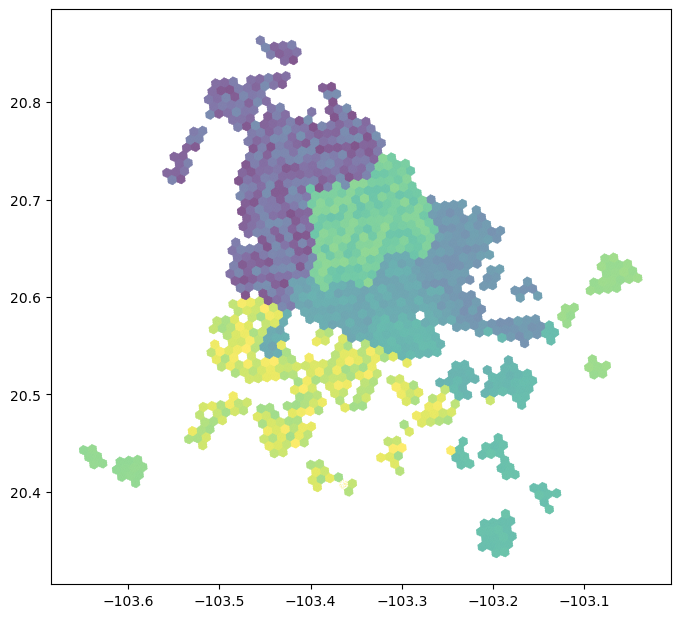

In [27]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = ndmi_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

### Nos damos cuenta que tenemos bastantes hexágonos faltantes. Hay que intentar rellenarlos con la base de datos de hexágonos de la zona metropolitana de gdl 'hex_gdl'

In [29]:
hexagonos_comunes = set(hex_gdl['hex_id_8']).intersection(set(ndmi_gdl['hex_id']))

# Crear un nuevo GeoDataFrame con los hexágonos comunes.
hexagonos_comunes_gdf = hex_gdl[hex_gdl['hex_id_8'].isin(hexagonos_comunes)]

# Mostrar el GeoDataFrame resultante.
print(hexagonos_comunes_gdf)

Empty GeoDataFrame
Columns: [geometry, hex_id_8, CVEGEO, metropolis]
Index: []


In [30]:
poligonos_comunes = set(hex_gdl['geometry']).intersection(set(ndmi_gdl['geometry']))

# Crear un nuevo GeoDataFrame con los hexágonos comunes.
poligonos_comunes_gdf = hex_gdl[hex_gdl['geometry'].isin(poligonos_comunes)]

# Mostrar el GeoDataFrame resultante.
print(poligonos_comunes_gdf)

Empty GeoDataFrame
Columns: [geometry, hex_id_8, CVEGEO, metropolis]
Index: []


Vemos que no tienen ni un solo hexágono similar, ni un solo poligono similar. Entonces aplicaremos modificaciones a una notebook que ya existe para fill hexagons.

## Ya que no he encontrado una forma de rellenarlos, seguiré así incompleto

In [8]:
ndmi_gdl = ndmi_gdl.set_crs("EPSG:4326")
inter_Gdl =inter_Gdl.set_crs("EPSG:4326")

In [32]:
ndmi_gdl.head(2)

,hex_id,geometry,res,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city
0,8b49ab4b261efff,"POLYGON ((-103.38872 20.75207, -103.38855 20.7...",11,-0.024430,0.088269,-0.045940,0.125081,-0.108787,0.233868,0.000099,Guadalajara
1,8b49ab4b2694fff,"POLYGON ((-103.38507 20.75226, -103.38490 20.7...",11,-0.001659,0.048773,-0.011628,0.100045,-0.044546,0.144592,-0.000135,Guadalajara


In [9]:
inter_Gdl.head(2)

,geometry,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,Parque,1
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,Parque,1


Vamos a encontrar los hexágonos que cuentan con espacios públicos dentro

In [10]:
inter_EspVerde = gpd.sjoin(ndmi_gdl, inter_Gdl, op='intersects')
inter_EspVerde.drop(columns=['index_right','city','res'], inplace=True)
inter_EspVerde.shape

(3930168, 14)

Vamos a encontrar los hexágonos que tenemos que no tienen espacio público verde

In [11]:
not_intersecting = ndmi_gdl[~ndmi_gdl.index.isin(inter_EspVerde.index)]
not_intersecting.shape

(120008, 11)

In [20]:
inter_EspVerde.head()

,hex_id,geometry,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
0,8b49ab4b261efff,"POLYGON ((-103.38872 20.75207, -103.38855 20.7...",-0.024430,0.088269,-0.045940,0.125081,-0.108787,0.233868,0.000099,8849ab4b27fffff,14120,Guadalajara,Camellón,0
1,8b49ab4b2694fff,"POLYGON ((-103.38507 20.75226, -103.38490 20.7...",-0.001659,0.048773,-0.011628,0.100045,-0.044546,0.144592,-0.000135,8849ab4b27fffff,14120,Guadalajara,Camellón,0
2,8b49ab4b26eafff,"POLYGON ((-103.39028 20.75465, -103.39011 20.7...",0.004639,0.078975,-0.003485,0.129107,-0.105572,0.234678,0.000270,8849ab4b27fffff,14120,Guadalajara,Camellón,0
3,8b49ab4b271dfff,"POLYGON ((-103.38996 20.74874, -103.38979 20.7...",0.099768,0.052265,0.098254,0.175194,0.033170,0.142024,-0.000491,8849ab4b27fffff,14120,Guadalajara,Camellón,0
4,8b49ab4b2613fff,"POLYGON ((-103.38830 20.75179, -103.38812 20.7...",-0.028204,0.106004,-0.051343,0.154841,-0.123025,0.277866,0.000392,8849ab4b27fffff,14120,Guadalajara,Camellón,0


In [11]:
print(inter_EspVerde.columns)

Index(['hex_id', 'geometry', 'ndmi_mean', 'ndmi_std', 'ndmi_median',
       'ndmi_max', 'ndmi_min', 'ndmi_diff', 'ndmi_tend', 'hex_id_8', 'CVEGEO',
       'metropolis', 'Tipo', 'EspVerPub'],
      dtype='object')


In [13]:
pd.isna(inter_EspVerde).sum()

hex_id         0
geometry       0
ndmi_mean      0
ndmi_std       0
ndmi_median    0
ndmi_max       0
ndmi_min       0
ndmi_diff      0
ndmi_tend      0
hex_id_8       0
CVEGEO         0
metropolis     0
Tipo           0
EspVerPub      0
dtype: int64

Ya que la variable que buscamos predecir esta en binario, usaremos regresión logística para tratar de predecir

In [12]:
EspVerPub = inter_EspVerde[inter_EspVerde.EspVerPub==1]
NoEspVerPub = inter_EspVerde[inter_EspVerde.EspVerPub==0]

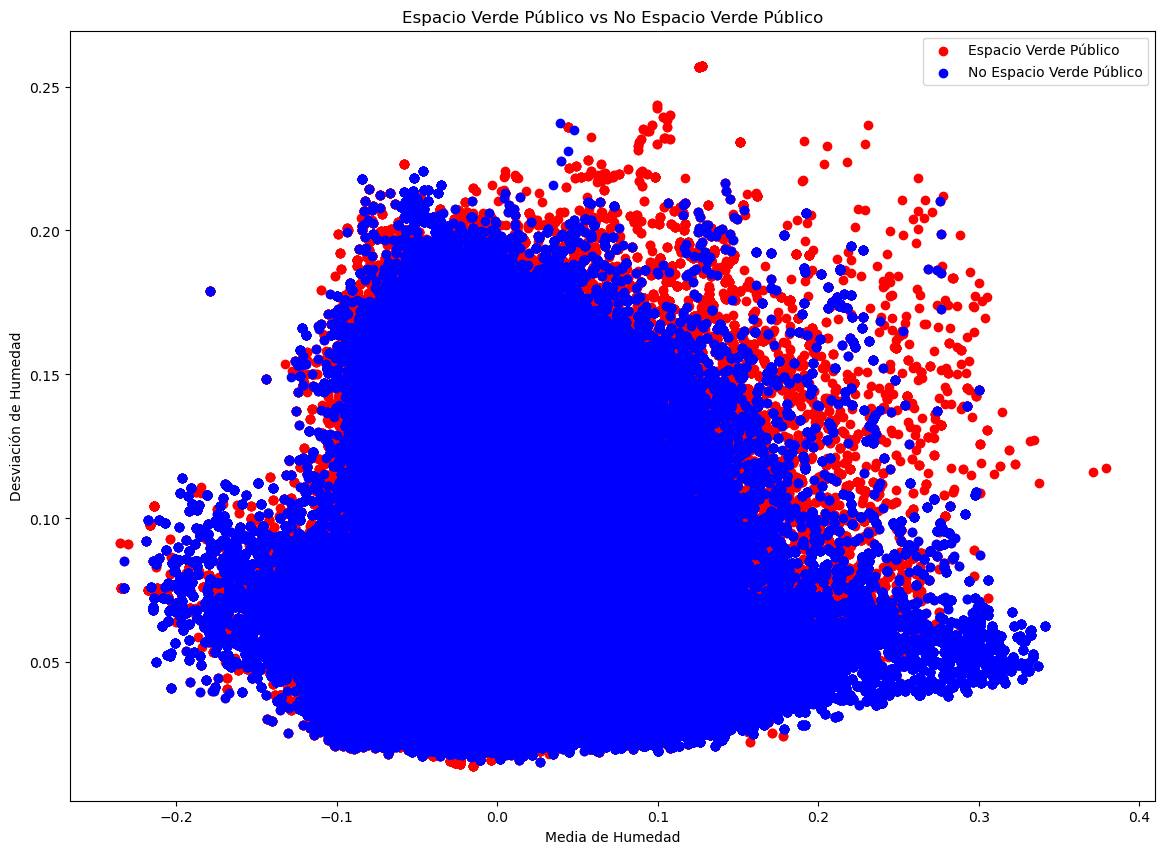

In [13]:
#Gráficamos Scatter Plot
plt.figure(figsize=(14, 10))
plt.scatter(EspVerPub.ndmi_mean, EspVerPub.ndmi_std, color = 'red', label = 'Espacio Verde Público')
plt.scatter(NoEspVerPub.ndmi_mean, NoEspVerPub.ndmi_std, color = 'blue', label = 'No Espacio Verde Público')
plt.title('Espacio Verde Público vs No Espacio Verde Público')
plt.xlabel('Media de Humedad')
plt.ylabel('Desviación de Humedad')
plt.legend()
plt.show()

## Regresión Logística

In [11]:
y = inter_EspVerde['EspVerPub']
x = inter_EspVerde[['ndmi_std', 'ndmi_median', 'ndmi_max', 'ndmi_min', 'ndmi_diff', 'ndmi_tend']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

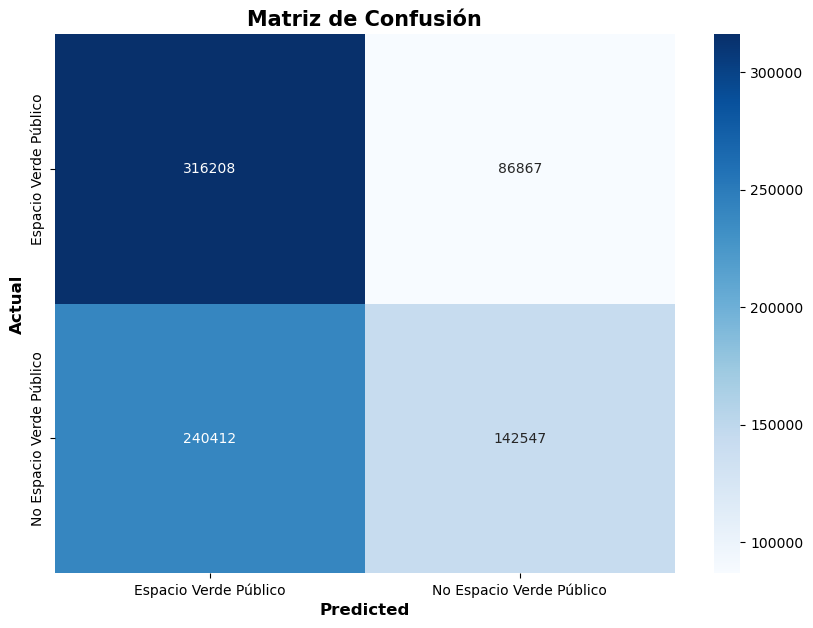

In [14]:
clf = LogisticRegression()
clf.fit(x_train_scale, y_train)
y_pred = clf.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

### Precisión del modelo

In [15]:
round(accuracy_score(y_test, y_pred), 4)

0.5836

Este modelo tiene un 58% de probabilidad de predecir correctamente, lo cual no es lo mejor

## Naive Bayes

In [25]:
y = inter_EspVerde['EspVerPub']
x = inter_EspVerde[['ndmi_std', 'ndmi_median', 'ndmi_max', 'ndmi_min', 'ndmi_diff', 'ndmi_tend']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [16]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

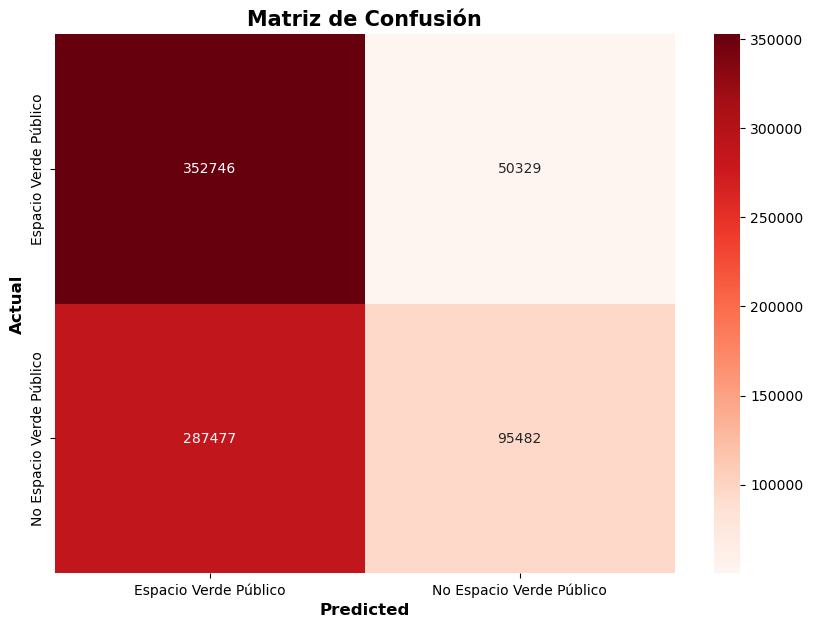

In [17]:
y_prend = nb.predict(x_test)
cm = confusion_matrix(y_test, y_prend)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [18]:
accuracy = accuracy_score(y_test, y_prend)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5702399641745777


Vemos que la exactitud es muy similar al de regresión logística. Aún así, vemos que este de Naive Bayes predice de forma muy buena los espacios públicos verde pero de forma muy mala los no espacios públicos verde por eso 58%

## Random Tree Forest Classifier (RTF)

In [14]:
#rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators según tus necesidades
#rf.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
#y_predd = rf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_predd)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_predd)
print(f'Accuracy: {accuracy}')

### Exportamos los hexágonos con información NDVI

In [8]:
hex_schema = "raster_analysis"
hex_table = "ndvi_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" = \'{c}\' AND \"res\" = {n}'
ndvi_gdl = aup.gdf_from_query(query, geometry_col='geometry')
ndvi_gdl.head(10)

,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city
0,8b49ab4b2758fff,"POLYGON ((-103.39247 20.75090, -103.39230 20.7...",11,0.180837,0.048030,0.188190,0.221286,0.124881,0.096405,-0.001652,Guadalajara
1,8b49ab4b270cfff,"POLYGON ((-103.39091 20.74832, -103.39074 20.7...",11,0.214160,0.061213,0.208285,0.287065,0.126807,0.160257,-0.000930,Guadalajara
2,8b49ab4b2792fff,"POLYGON ((-103.38489 20.74954, -103.38472 20.7...",11,0.263410,0.071279,0.278474,0.322699,0.127680,0.195019,-0.001351,Guadalajara
3,8b49ab4b2722fff,"POLYGON ((-103.39016 20.74679, -103.38998 20.7...",11,0.131733,0.060629,0.132967,0.212436,0.067657,0.144780,-0.000991,Guadalajara
4,8b49ab4b26f4fff,"POLYGON ((-103.38863 20.75304, -103.38845 20.7...",11,0.067932,0.014523,0.069427,0.084592,0.052588,0.032005,-0.000478,Guadalajara
5,8b49ab4b2674fff,"POLYGON ((-103.39195 20.75160, -103.39177 20.7...",11,0.247324,0.060373,0.260862,0.310517,0.162472,0.148045,-0.001337,Guadalajara
6,8b49ab4b26eefff,"POLYGON ((-103.39033 20.75416, -103.39016 20.7...",11,0.100325,0.021800,0.108125,0.116121,0.070691,0.045430,-0.000942,Guadalajara
7,8b49ab4b27a9fff,"POLYGON ((-103.38854 20.74935, -103.38836 20.7...",11,0.175505,0.046047,0.175696,0.230879,0.113555,0.117324,-0.001301,Guadalajara
8,8b49ab4b278bfff,"POLYGON ((-103.38749 20.75074, -103.38732 20.7...",11,0.263129,0.256576,0.101349,0.453079,0.089396,0.363683,-0.006402,Guadalajara
9,8b49ab4b2704fff,"POLYGON ((-103.39011 20.74728, -103.38993 20.7...",11,0.240424,0.103164,0.225964,0.417322,0.109886,0.307436,-0.000965,Guadalajara


In [ ]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = ndvi_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [9]:
ndvi_gdl = ndvi_gdl.set_crs("EPSG:4326")
inter_Gdl =inter_Gdl.set_crs("EPSG:4326")

In [17]:
ndvi_gdl.head(2)

,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city
0,8b49ab4b2758fff,"POLYGON ((-103.39247 20.75090, -103.39230 20.7...",11,0.180837,0.048030,0.188190,0.221286,0.124881,0.096405,-0.001652,Guadalajara
1,8b49ab4b270cfff,"POLYGON ((-103.39091 20.74832, -103.39074 20.7...",11,0.214160,0.061213,0.208285,0.287065,0.126807,0.160257,-0.000930,Guadalajara


In [10]:
inter_Gdl.head(2)

,geometry,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,Parque,1
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,Parque,1


In [11]:
inter_EspVerde = gpd.sjoin(ndvi_gdl, inter_Gdl, op='intersects')
inter_EspVerde.drop(columns=['index_right','city','res'], inplace=True)
inter_EspVerde.shape

(3978777, 14)

In [12]:
inter_EspVerde.head()

,hex_id,geometry,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
0,8b49ab4b2758fff,"POLYGON ((-103.39247 20.75090, -103.39230 20.7...",0.180837,0.048030,0.188190,0.221286,0.124881,0.096405,-0.001652,8849ab4b27fffff,14120,Guadalajara,Camellón,0
1,8b49ab4b270cfff,"POLYGON ((-103.39091 20.74832, -103.39074 20.7...",0.214160,0.061213,0.208285,0.287065,0.126807,0.160257,-0.000930,8849ab4b27fffff,14120,Guadalajara,Camellón,0
2,8b49ab4b2792fff,"POLYGON ((-103.38489 20.74954, -103.38472 20.7...",0.263410,0.071279,0.278474,0.322699,0.127680,0.195019,-0.001351,8849ab4b27fffff,14120,Guadalajara,Camellón,0
3,8b49ab4b2722fff,"POLYGON ((-103.39016 20.74679, -103.38998 20.7...",0.131733,0.060629,0.132967,0.212436,0.067657,0.144780,-0.000991,8849ab4b27fffff,14120,Guadalajara,Camellón,0
4,8b49ab4b26f4fff,"POLYGON ((-103.38863 20.75304, -103.38845 20.7...",0.067932,0.014523,0.069427,0.084592,0.052588,0.032005,-0.000478,8849ab4b27fffff,14120,Guadalajara,Camellón,0


In [13]:
print(inter_EspVerde.columns)

Index(['hex_id', 'geometry', 'ndvi_mean', 'ndvi_std', 'ndvi_median',
       'ndvi_max', 'ndvi_min', 'ndvi_diff', 'ndvi_tend', 'hex_id_8', 'CVEGEO',
       'metropolis', 'Tipo', 'EspVerPub'],
      dtype='object')


In [14]:
pd.isna(inter_EspVerde).sum()

hex_id         0
geometry       0
ndvi_mean      0
ndvi_std       0
ndvi_median    0
ndvi_max       0
ndvi_min       0
ndvi_diff      0
ndvi_tend      0
hex_id_8       0
CVEGEO         0
metropolis     0
Tipo           0
EspVerPub      0
dtype: int64

In [15]:
EspVerPub = inter_EspVerde[inter_EspVerde.EspVerPub==1]
NoEspVerPub = inter_EspVerde[inter_EspVerde.EspVerPub==0]

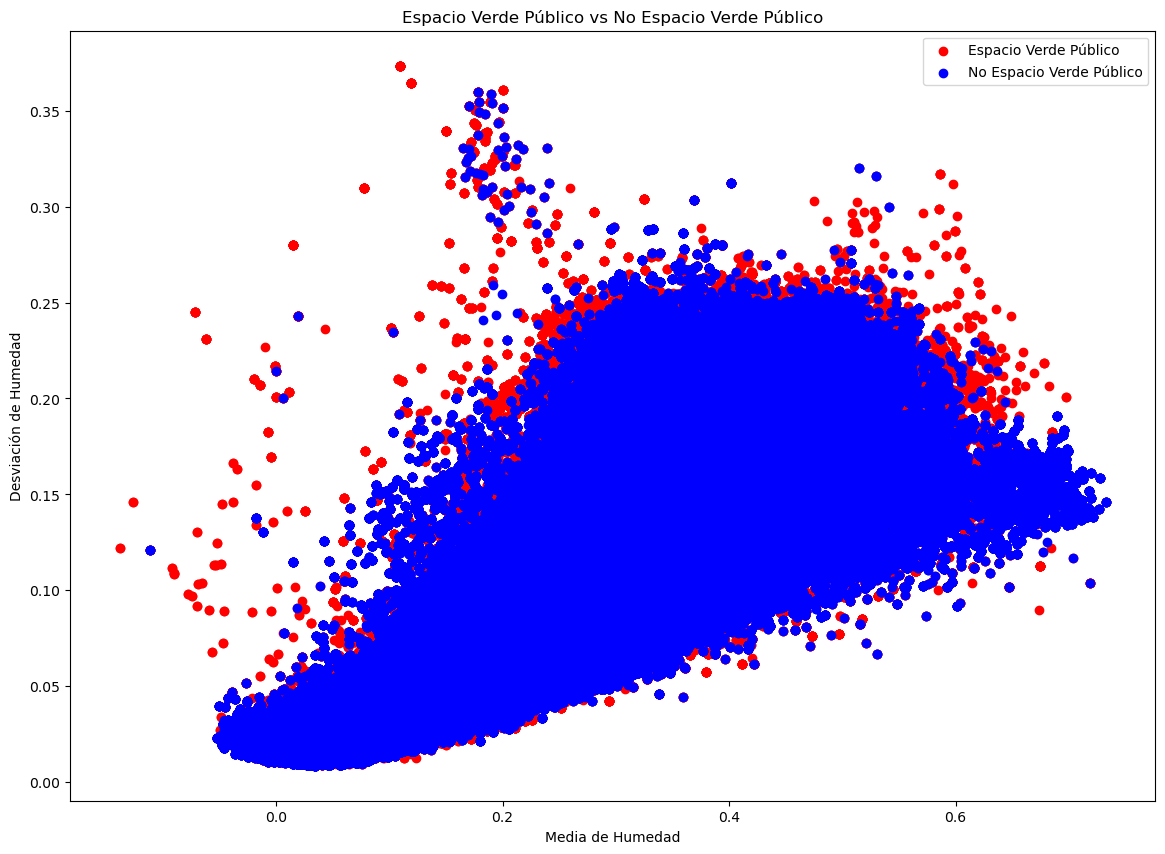

In [16]:
#Gráficamos Scatter Plot
plt.figure(figsize=(14, 10))
plt.scatter(EspVerPub.ndvi_mean, EspVerPub.ndvi_std, color = 'red', label = 'Espacio Verde Público')
plt.scatter(NoEspVerPub.ndvi_mean, NoEspVerPub.ndvi_std, color = 'blue', label = 'No Espacio Verde Público')
plt.title('Espacio Verde Público vs No Espacio Verde Público')
plt.xlabel('Media de Vegetación')
plt.ylabel('Desviación de Vegetación')
plt.legend()
plt.show()

## Regresión Logística

In [17]:
y = inter_EspVerde['EspVerPub']
x = inter_EspVerde[['ndvi_std', 'ndvi_median', 'ndvi_max', 'ndvi_min', 'ndvi_diff', 'ndvi_tend']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

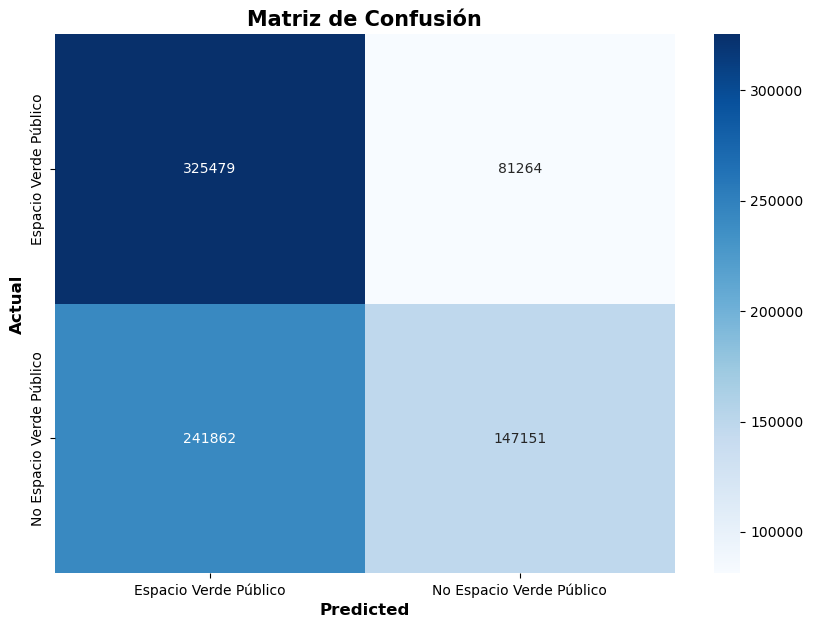

In [18]:
clf = LogisticRegression()
clf.fit(x_train_scale, y_train)
y_pred = clf.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [19]:
round(accuracy_score(y_test, y_pred), 4)

0.5939

60 %. Es lo mejor hasta el momento

## Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

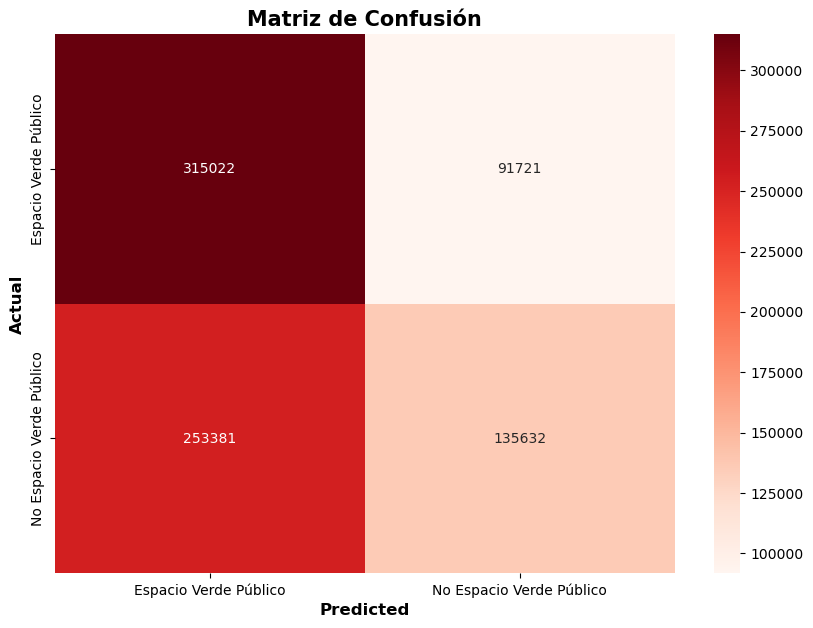

In [21]:
y_prend = nb.predict(x_test)
cm = confusion_matrix(y_test, y_prend)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [22]:
accuracy = accuracy_score(y_test, y_prend)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5663218373471265


El mejor clasificador hasta ahora ha sido la regresión logística con vegetación

## Random Forest Classifier

### Exportamos los hexágonos con información temperatura

In [9]:
hex_schema = "raster_analysis"
hex_table = "temperature_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" = \'{c}\' AND \"res\" = {n}'
temp_gdl = aup.gdf_from_query(query, geometry_col='geometry')
temp_gdl.head(10)

,hex_id,geometry,res,temperature_mean,temperature_std,temperature_median,temperature_max,temperature_min,temperature_diff,temperature_tend,city,temp_diff_mean
0,8b49ab4b27adfff,"POLYGON ((-103.38859 20.74887, -103.38841 20.7...",11,37.823437,5.978256,36.609375,47.162500,28.625000,18.537500,0.011578,Guadalajara,2.377778
1,8b49ab4b20dafff,"POLYGON ((-103.39233 20.74770, -103.39216 20.7...",11,38.549219,6.348481,38.738281,47.343750,28.037500,19.306250,-0.013021,Guadalajara,3.103559
2,8b49ab4b2746fff,"POLYGON ((-103.39261 20.74944, -103.39244 20.7...",11,36.682552,6.244945,35.937500,46.093750,26.906250,19.187500,0.000000,Guadalajara,1.236893
3,8b49ab4b26a3fff,"POLYGON ((-103.38692 20.75192, -103.38675 20.7...",11,36.791964,6.223414,35.857143,45.557143,27.164286,18.392857,0.033585,Guadalajara,1.346305
4,8b49ab4b26ecfff,"POLYGON ((-103.39080 20.75396, -103.39063 20.7...",11,36.651190,6.084317,35.267857,45.471429,26.785714,18.685714,0.010743,Guadalajara,1.205531
5,8b49ab4b2636fff,"POLYGON ((-103.38849 20.74984, -103.38832 20.7...",11,38.221615,6.083548,36.739584,47.106250,28.812500,18.293750,0.024924,Guadalajara,2.775955
6,8b49ab4b26a9fff,"POLYGON ((-103.38820 20.75276, -103.38803 20.7...",11,37.501562,6.385443,36.070312,46.725000,27.537500,19.187500,0.019783,Guadalajara,2.055903
7,8b49ab4b2794fff,"POLYGON ((-103.38541 20.74885, -103.38524 20.7...",11,37.613281,6.393694,36.390625,46.493750,27.693750,18.800000,0.065428,Guadalajara,2.167622
8,8b49ab4b276efff,"POLYGON ((-103.39399 20.74931, -103.39382 20.7...",11,38.539063,6.194318,38.296875,48.018750,28.687500,19.331250,-0.011962,Guadalajara,3.093403
9,8b49ab4b2633fff,"POLYGON ((-103.38887 20.75061, -103.38869 20.7...",11,37.182143,5.999037,35.803571,45.914286,27.878571,18.035714,0.027559,Guadalajara,1.736483


In [ ]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = temp_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [8]:
temp_gdl = temp_gdl.set_crs("EPSG:4326")
inter_Gdl =inter_Gdl.set_crs("EPSG:4326")

In [9]:
inter_EspVerdeTemp = gpd.sjoin(temp_gdl, inter_Gdl, op='intersects')
inter_EspVerdeTemp.drop(columns=['index_right','city','res'], inplace=True)
inter_EspVerdeTemp.shape

(3978777, 15)

In [10]:
inter_EspVerdeTemp.head()

,hex_id,geometry,temperature_mean,temperature_std,temperature_median,temperature_max,temperature_min,temperature_diff,temperature_tend,temp_diff_mean,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
0,8b49ab4b27adfff,"POLYGON ((-103.38859 20.74887, -103.38841 20.7...",37.823437,5.978256,36.609375,47.162500,28.625000,18.537500,0.011578,2.377778,8849ab4b27fffff,14120,Guadalajara,Camellón,0
1,8b49ab4b20dafff,"POLYGON ((-103.39233 20.74770, -103.39216 20.7...",38.549219,6.348481,38.738281,47.343750,28.037500,19.306250,-0.013021,3.103559,8849ab4b27fffff,14120,Guadalajara,Camellón,0
2,8b49ab4b2746fff,"POLYGON ((-103.39261 20.74944, -103.39244 20.7...",36.682552,6.244945,35.937500,46.093750,26.906250,19.187500,0.000000,1.236893,8849ab4b27fffff,14120,Guadalajara,Camellón,0
3,8b49ab4b26a3fff,"POLYGON ((-103.38692 20.75192, -103.38675 20.7...",36.791964,6.223414,35.857143,45.557143,27.164286,18.392857,0.033585,1.346305,8849ab4b27fffff,14120,Guadalajara,Camellón,0
4,8b49ab4b26ecfff,"POLYGON ((-103.39080 20.75396, -103.39063 20.7...",36.651190,6.084317,35.267857,45.471429,26.785714,18.685714,0.010743,1.205531,8849ab4b27fffff,14120,Guadalajara,Camellón,0


In [11]:
print(inter_EspVerdeTemp.columns)

Index(['hex_id', 'geometry', 'temperature_mean', 'temperature_std',
       'temperature_median', 'temperature_max', 'temperature_min',
       'temperature_diff', 'temperature_tend', 'temp_diff_mean', 'hex_id_8',
       'CVEGEO', 'metropolis', 'Tipo', 'EspVerPub'],
      dtype='object')


In [12]:
pd.isna(inter_EspVerdeTemp).sum()

hex_id                0
geometry              0
temperature_mean      0
temperature_std       0
temperature_median    0
temperature_max       0
temperature_min       0
temperature_diff      0
temperature_tend      0
temp_diff_mean        0
hex_id_8              0
CVEGEO                0
metropolis            0
Tipo                  0
EspVerPub             0
dtype: int64

In [13]:
EspVerPub = inter_EspVerdeTemp[inter_EspVerdeTemp.EspVerPub==1]
NoEspVerPub = inter_EspVerdeTemp[inter_EspVerdeTemp.EspVerPub==0]

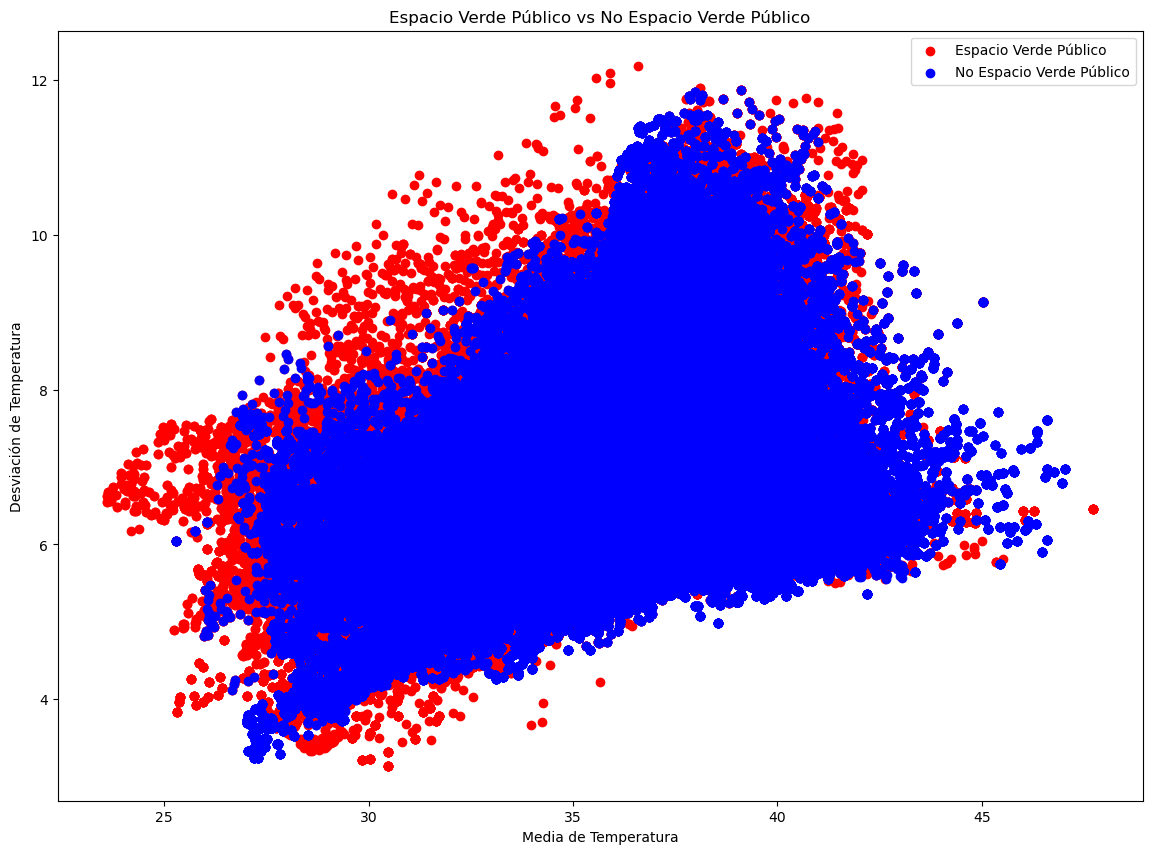

In [14]:
#Gráficamos Scatter Plot
plt.figure(figsize=(14, 10))
plt.scatter(EspVerPub.temperature_mean, EspVerPub.temperature_std, color = 'red', label = 'Espacio Verde Público')
plt.scatter(NoEspVerPub.temperature_mean, NoEspVerPub.temperature_std, color = 'blue', label = 'No Espacio Verde Público')
plt.title('Espacio Verde Público vs No Espacio Verde Público')
plt.xlabel('Media de Temperatura')
plt.ylabel('Desviación de Temperatura')
plt.legend()
plt.show()

## Regresión Logística

In [10]:
y = inter_EspVerdeTemp['EspVerPub']
x = inter_EspVerdeTemp[['temperature_std', 'temperature_median', 'temperature_max', 'temperature_min', 'temperature_diff', 'temperature_tend','temp_diff_mean']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

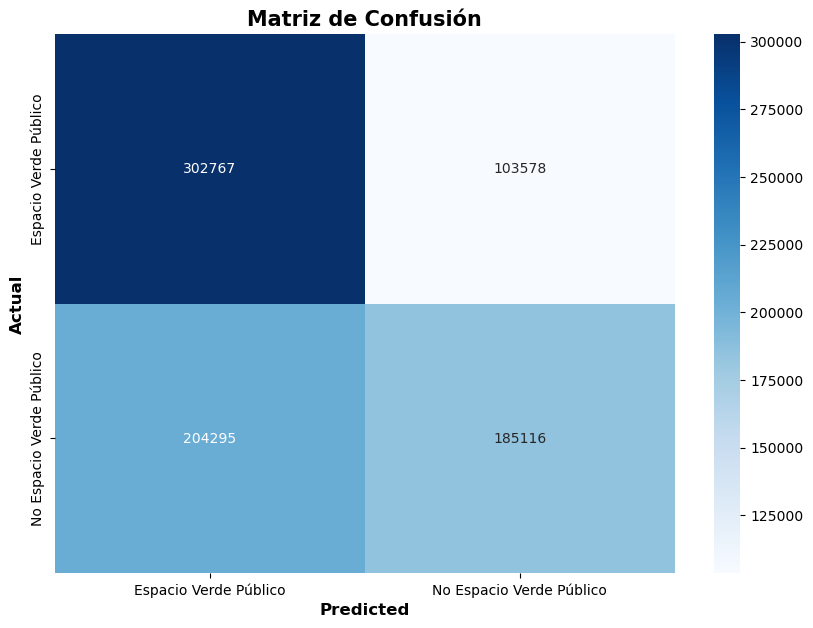

In [11]:
clf = LogisticRegression()
clf.fit(x_train_scale, y_train)
y_pred = clf.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [12]:
round(accuracy_score(y_test, y_pred), 4)

0.6131

61% de accuracy. El mejor hasta el momento pero no es lo mejor. 

## Naive Bayes

In [13]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

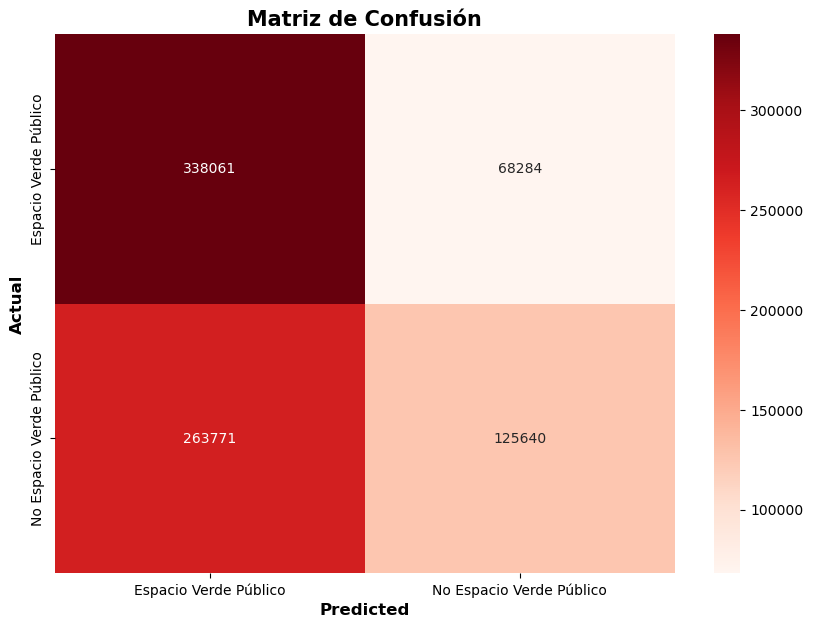

In [14]:
y_prend = nb.predict(x_test)
cm = confusion_matrix(y_test, y_prend)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_prend)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5827175666912974


## Random Forest Classifier

# Juntamos los 3 datasets

In [11]:
hex_schema = "raster_analysis"
hex_table = "temperature_analysis_hex"
hex_tabl = "ndvi_analysis_hex"
hex_tablee = "ndmi_analysis_hex"
tempe = "tempe"
ndmi = "ndmi"
ndvi = "ndvi"
hex_id = "hex_id"
c = 'Guadalajara'
n = '11'
query = f'SELECT {tempe}.hex_id, {tempe}.geometry, {tempe}.city, {tempe}.res, temperature_std, temperature_median, temperature_max, temperature_min, temperature_diff, temperature_tend,temp_diff_mean,ndvi_mean, ndvi_std, ndvi_median, ndvi_max, ndvi_min, ndvi_diff, ndvi_tend,ndmi_mean, ndmi_std, ndmi_median, ndmi_max, ndmi_min, ndmi_diff, ndmi_tend FROM {hex_schema}.{hex_table} {tempe} INNER JOIN {hex_schema}.{hex_tablee} {ndmi} ON {tempe}.{hex_id} = {ndmi}.{hex_id} INNER JOIN {hex_schema}.{hex_tabl} {ndvi} ON {tempe}.{hex_id} = {ndvi}.{hex_id} WHERE {tempe}.\"city\" = \'{c}\' AND {tempe}.\"res\" = {n}'
int_gdl = aup.gdf_from_query(query, geometry_col='geometry')
int_gdl.head(10)

,hex_id,geometry,city,res,temperature_std,temperature_median,temperature_max,temperature_min,temperature_diff,temperature_tend,...,ndvi_min,ndvi_diff,ndvi_tend,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend
0,8b49ab4b4251fff,"POLYGON ((-103.42699 20.71866, -103.42681 20.7...",Guadalajara,11,7.671305,35.083333,48.333333,24.600000,23.733333,0.043336,...,0.128978,0.582168,-0.000559,-0.025509,0.156628,-0.102273,0.299765,-0.168912,0.468677,0.001078
1,8b49ab483012fff,"POLYGON ((-103.45214 20.80832, -103.45197 20.8...",Guadalajara,11,6.786320,34.562500,45.691667,25.333333,20.358333,0.050123,...,0.118105,0.112830,0.000948,0.002319,0.036576,-0.000642,0.042872,-0.037741,0.080613,0.000876
2,8b49ab4aa743fff,"POLYGON ((-103.49977 20.79504, -103.49960 20.7...",Guadalajara,11,7.352944,35.000000,46.500000,24.216667,22.283333,0.024568,...,0.079000,0.070571,-0.001220,-0.062980,0.026789,-0.065607,-0.006438,-0.095040,0.088602,0.000195
3,8b49ab4aa702fff,"POLYGON ((-103.49636 20.79280, -103.49619 20.7...",Guadalajara,11,7.888192,33.611111,45.972222,21.594444,24.377778,0.064061,...,0.154954,0.211191,-0.000958,-0.002400,0.049017,-0.009385,0.072163,-0.065068,0.137231,0.000412
4,8b49ab4aa74afff,"POLYGON ((-103.50015 20.79581, -103.49998 20.7...",Guadalajara,11,7.360690,34.718750,46.281250,24.037500,22.243750,0.022167,...,0.105053,0.088165,-0.000846,-0.055549,0.027396,-0.060200,-0.004267,-0.085793,0.081525,0.000296
5,8b49ab4aa664fff,"POLYGON ((-103.50011 20.79630, -103.49993 20.7...",Guadalajara,11,7.376984,34.714286,46.421429,24.114286,22.307143,0.024371,...,0.065064,0.076112,-0.000523,-0.077999,0.028973,-0.082769,-0.020076,-0.113304,0.093228,0.000366
6,8b49ab4aa6e8fff,"POLYGON ((-103.49754 20.79928, -103.49737 20.7...",Guadalajara,11,7.428421,34.453125,45.750000,22.906250,22.843750,0.062500,...,0.034327,0.067222,-0.000437,-0.088711,0.030948,-0.092489,-0.024465,-0.118667,0.094202,0.000524
7,8b49ab5910adfff,"POLYGON ((-103.42495 20.63853, -103.42478 20.6...",Guadalajara,11,6.287027,36.511719,45.881250,26.756250,19.125000,0.001674,...,0.019377,0.081469,-0.000385,-0.025653,0.060448,-0.041467,0.119969,-0.091125,0.211094,-0.000320
8,8b49ab59109efff,"POLYGON ((-103.42211 20.63977, -103.42194 20.6...",Guadalajara,11,6.365696,36.333334,46.292857,26.771429,19.521429,-0.001764,...,0.047811,0.050080,-0.000277,-0.042513,0.050083,-0.059346,0.084254,-0.081163,0.165417,0.000475
9,8b49ab59110efff,"POLYGON ((-103.42714 20.63479, -103.42696 20.6...",Guadalajara,11,6.472464,38.375000,47.731250,28.412500,19.318750,0.009365,...,0.046128,0.050776,-0.000560,-0.060251,0.051436,-0.078704,0.051040,-0.100639,0.151679,0.000379


In [12]:
inter_Gdl =inter_Gdl.set_crs("EPSG:4326")
int_gdl = int_gdl.set_crs("EPSG:4326")

In [ ]:
inter_EspVerdeTodo = gpd.sjoin(int_gdl, inter_Gdl, op='intersects')
inter_EspVerdeTodo.drop(columns=['index_right','city','res'], inplace=True)
inter_EspVerdeTodo.shape

In [ ]:
inter_EspVerdeTodo.head(3)